# Tutorial 1: The Basic Tools of the Deep Life Sciences
Welcome to DeepChem's introductory tutorial for the deep life sciences. This series of notebooks is step-by-step guide for you to get to know the new tools and techniques needed to do deep learning for the life sciences. We'll start from the basics, assuming that you're new to machine learning and the life sciences, and build up a repertoire of tools and techniques that you can use to do meaningful work in the life sciences.

**Scope:** This tutorial will encompass both the machine learning and data handling needed to build systems for the deep life sciences.

## Colab

This tutorial and the rest in the sequences are designed to be done in Google colab. If you'd like to open this notebook in colab, you can use the following link.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/deepchem/deepchem/blob/master/examples/tutorials/01_The_Basic_Tools_of_the_Deep_Life_Sciences.ipynb)


## Why do the DeepChem Tutorial?

**1) Career Advancement:** Applying AI in the life sciences is a booming
industry at present. There are a host of newly funded startups and initiatives
at large pharmaceutical and biotech companies centered around AI. Learning and
mastering DeepChem will bring you to the forefront of this field and will
prepare you to enter a career in this field.

**2) Humanitarian Considerations:** Disease is the oldest cause of human
suffering. From the dawn of human civilization, humans have suffered from pathogens,
cancers, and neurological conditions. One of the greatest achievements of
the last few centuries has been the development of effective treatments for
many diseases. By mastering the skills in this tutorial, you will be able to
stand on the shoulders of the giants of the past to help develop new
medicine.

**3) Lowering the Cost of Medicine:** The art of developing new medicine is
currently an elite skill that can only be practiced by a small core of expert
practitioners. By enabling the growth of open source tools for drug discovery,
you can help democratize these skills and open up drug discovery to more
competition. Increased competition can help drive down the cost of medicine.

## Getting Extra Credit
If you're excited about DeepChem and want to get more more involved, there's a couple of things that you can do right now:

* Star DeepChem on GitHub! - https://github.com/deepchem/deepchem
* Join the DeepChem forums and introduce yourself! - https://forum.deepchem.io
* Say hi on the DeepChem gitter - https://gitter.im/deepchem/Lobby
* Make a YouTube video teaching the contents of this notebook.


## Prerequisites

This tutorial will assume some basic familiarity with the Python data science ecosystem. We will assume that you have familiarity with libraries such as Numpy, Pandas, and TensorFlow. We'll provide some brief refreshers on basics through the tutorial so don't worry if you're not an expert.

## Setup

The first step is to get DeepChem up and running. We recommend using Google Colab to work through this tutorial series. You'll need to run the following commands to get DeepChem installed on your colab notebook. Note that this will take something like 5 minutes to run on your colab instance.

In [1]:
%tensorflow_version 1.x
!curl -Lo deepchem_installer.py https://raw.githubusercontent.com/deepchem/deepchem/master/scripts/colab_install.py
import deepchem_installer
%time deepchem_installer.install(version='2.3.0')

TensorFlow 1.x selected.
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3477  100  3477    0     0  19644      0 --:--:-- --:--:-- --:--:-- 19644


add /root/miniconda/lib/python3.6/site-packages to PYTHONPATH
python version: 3.6.9
fetching installer from https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
done
installing miniconda to /root/miniconda
done
installing deepchem
done
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



deepchem-2.3.0 installation finished!


CPU times: user 3.15 s, sys: 662 ms, total: 3.81 s
Wall time: 2min 22s


You can of course run this tutorial locally if you prefer. In this case, don't run the above cell since it will download and install Anaconda on your local machine. In either case, we can now import `deepchem` the package to play with.

In [0]:
# Run this cell to see if things work
import deepchem as dc

# Basic Data Handling in DeepChem
What does it take to do deep learning on the life sciences? Well, the first thing we'll need to do is actually handle some data. How can we start handling some basic data? For beginners, let's just take a look at some synthetic data.

To generate some basic synthetic data, we will use Numpy to create some basic arrays.

In [0]:
import numpy as np

data = np.random.random((4, 4))
labels = np.random.random((4,)) # labels of size 20x1

We've given these arrays some evocative names: "data" and "labels." For now, don't worry too much about the names, but just note that the arrays have different shapes. Let's take a quick look to get a feeling for these arrays

In [4]:
data, labels

(array([[0.19330935, 0.11190623, 0.44660479, 0.82294167],
        [0.23733282, 0.20134574, 0.42438331, 0.7899084 ],
        [0.47503811, 0.95041665, 0.02520914, 0.8065749 ],
        [0.31487199, 0.12439971, 0.77241039, 0.27010706]]),
 array([0.00428323, 0.82485774, 0.99352178, 0.47443043]))

In order to be able to work with this data in DeepChem, we need to wrap these arrays so DeepChem knows how to work with them. DeepChem has a `Dataset` API that it uses to facilitate its handling of datasets. For handling of Numpy datasets, we use DeepChem's `NumpyDataset` object.

In [0]:
from deepchem.data.datasets import NumpyDataset

dataset = NumpyDataset(data, labels)

Ok, now what? We have these arrays in a `NumpyDataset` object. What can we do with it? Let's try printing out the object.

In [6]:
dataset

Ok, that's not terribly informative. It's telling us that `dataset` is a Python object that lives somewhere in memory. Can we recover the two datasets that we used to construct this object? Luckily, the DeepChem API allows us to recover the two original datasets by calling the `dataset.X` and `dataset.y` attributes of the original object.

In [7]:
dataset.X, dataset.y

(array([[0.19330935, 0.11190623, 0.44660479, 0.82294167],
        [0.23733282, 0.20134574, 0.42438331, 0.7899084 ],
        [0.47503811, 0.95041665, 0.02520914, 0.8065749 ],
        [0.31487199, 0.12439971, 0.77241039, 0.27010706]]),
 array([0.00428323, 0.82485774, 0.99352178, 0.47443043]))

This set of transformations raises a few questions. First, what was the point of it all? Why would we want to wrap objects this way instead of working with the raw Numpy arrays? The simple answer is for have a unified API for working with larger datasets. Suppose that `X` and `y` are so large that they can't fit easily into memory. What would we do then? Being able to work with an abstract `dataset` object proves very convenient then. In fact, you'll have reason to use this feature of `Dataset` later in the tutorial series.

What else can we do with the `dataset` object? It turns out that it can be useful to be able to walk through the datapoints in the `dataset` one at a time. For that, we can use the `dataset.itersamples()` method.

In [8]:
for x, y, _, _ in dataset.itersamples():
    print(x, y)

[0.19330935 0.11190623 0.44660479 0.82294167] 0.004283228755889379
[0.23733282 0.20134574 0.42438331 0.7899084 ] 0.8248577426415518
[0.47503811 0.95041665 0.02520914 0.8065749 ] 0.9935217763676747
[0.31487199 0.12439971 0.77241039 0.27010706] 0.4744304292698883


There are a couple of other fields that the `dataset` object tracks. The first is `dataset.ids`. This is a listing of unique identifiers for the datapoitns in the dataset.

In [9]:
dataset.ids

array([0, 1, 2, 3], dtype=object)

In addition, the `dataset` object has a field `dataset.w`. This is the "example weight" associated with each datapoint. Since we haven't explicitly assigned the weights, this is simply going to be all ones.

In [10]:
dataset.w

array([1., 1., 1., 1.], dtype=float32)

What if we want to set nontrivial weights for a dataset? One time we might want to do this is if we have a dataset where there are only a few positive examples to play with. It's pretty straightforward to do this with DeepChem.

In [11]:
w = np.random.random((4,)) # initializing weights with random vector of size 4x1
dataset_with_weights = NumpyDataset(data, labels, w) # creates numpy dataset object
dataset_with_weights.w

array([0.20590244, 0.60422512, 0.84054797, 0.60248335])

## MNIST Example

Just to get a better understanding, we'll use the venerable MNIST dataset and use `NumpyDataset` to store the data. We're going to make use of the `tensorflow-datasets` package to facilitate our data reading. You'll need to install this package in order to make use of it. 

In [0]:
# Install tensorflow-datasets
## TODO(rbharath): Switch to stable version on release
# TODO(rbharath): This only works on TF2. Uncomment once we've upgraded.
#!pip install -q --upgrade tfds-nightly tf-nightly

In [0]:
# TODO(rbharath): This cell will only work with TF2 installed. Swap to this as default soon.

#import tensorflow_datasets as tfds

#data_dir = '/tmp/tfds'

## Fetch full datasets for evaluation
# tfds.load returns tf.Tensors (or tf.data.Datasets if batch_size != -1)
# You can convert them to NumPy arrays (or iterables of NumPy arrays) with tfds.dataset_as_numpy
#mnist_data, info = tfds.load(name="mnist", batch_size=-1, data_dir=data_dir, with_info=True)
#mnist_data = tfds.as_numpy(mnist_data)
#train_data, test_data = mnist_data['train'], mnist_data['test']
#num_labels = info.features['label'].num_classes
#h, w, c = info.features['image'].shape
#num_pixels = h * w * c

## Full train set
#train_images, train_labels = train_data['image'], train_data['label']
#train_images = np.reshape(train_images, (len(train_images), num_pixels))
#train_labels = one_hot(train_labels, num_labels)

## Full test set
#test_images, test_labels = test_data['image'], test_data['label']
#test_images = np.reshape(test_images, (len(test_images), num_pixels))
#test_labels = one_hot(test_labels, num_labels)

In [14]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
# Load the numpy data of MNIST into NumpyDataset
train = NumpyDataset(mnist.train.images, mnist.train.labels)
valid = NumpyDataset(mnist.validation.images, mnist.validation.labels)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

Let's take a look at some of the data we've loaded so we can visualize our samples.

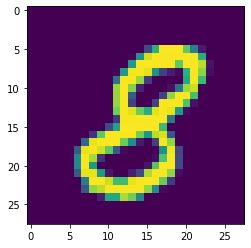

In [15]:
import matplotlib.pyplot as plt

# Visualize one sample 
sample = np.reshape(train.X[5], (28, 28))
plt.imshow(sample)
plt.show()

## Converting a Numpy Array to tf.data.dataset()


Let's say you want to use the `tf.data` module instead of DeepChem's data handling library. Doing this is straightforward and is quite similar to getting a `NumpyDataset` object from numpy arrays.

In [16]:
import tensorflow as tf
data_small = np.random.random((4,5))
label_small = np.random.random((4,))
dataset = tf.data.Dataset.from_tensor_slices((data_small, label_small))
print ("Data\n")
print (data_small)
print ("\n Labels")
print (label_small)

Data

[[0.13069116 0.11472656 0.2155923  0.9727515  0.21519239]
 [0.66106298 0.35152465 0.73548336 0.24584364 0.15193656]
 [0.96722837 0.97295284 0.87249717 0.67836399 0.95312763]
 [0.8326375  0.87615737 0.06231603 0.79597528 0.9668341 ]]

 Labels
[0.45182705 0.03122323 0.41106018 0.35049048]


## Extracting the numpy dataset from tf.data

In order to extract the numpy array from the `tf.data`, you first need to define an `iterator` to iterate over the `tf.data.Dataset` object and then in the tensorflow session, run over the iterator to get the data instances. Let's have a look at how it's done.

In [17]:
iterator = dataset.make_one_shot_iterator() # iterator
next_element = iterator.get_next()
numpy_data = np.zeros((4, 5))
numpy_label = np.zeros((4,))
sess = tf.Session() # tensorflow session 
for i in range(4):
    data_, label_ = sess.run(next_element) # data_ contains the data and label_ contains the labels that we fed in the previous step
    numpy_data[i, :] = data_
    numpy_label[i] = label_
    
print ("Numpy Data")
print(numpy_data)
print ("\n Numpy Label")
print(numpy_label)

Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)`.
Numpy Data
[[0.13069116 0.11472656 0.2155923  0.9727515  0.21519239]
 [0.66106298 0.35152465 0.73548336 0.24584364 0.15193656]
 [0.96722837 0.97295284 0.87249717 0.67836399 0.95312763]
 [0.8326375  0.87615737 0.06231603 0.79597528 0.9668341 ]]

 Numpy Label
[0.45182705 0.03122323 0.41106018 0.35049048]


Now that you have the numpy arrays of `data` and `labels`, you can convert it to `NumpyDataset`.

In [18]:
dataset_ = NumpyDataset(numpy_data, numpy_label) # convert to NumpyDataset
dataset_.X  # printing just to check if the data is same!!

array([[0.13069116, 0.11472656, 0.2155923 , 0.9727515 , 0.21519239],
       [0.66106298, 0.35152465, 0.73548336, 0.24584364, 0.15193656],
       [0.96722837, 0.97295284, 0.87249717, 0.67836399, 0.95312763],
       [0.8326375 , 0.87615737, 0.06231603, 0.79597528, 0.9668341 ]])

## Converting NumpyDataset to `tf.data`

This can be easily done by the `make_iterator()` method of `NumpyDataset`. This converts the `NumpyDataset` to `tf.data`. Let's look how it's done!

In [19]:
iterator_ = dataset_.make_iterator() # Using make_iterator for converting NumpyDataset to tf.data
next_element_ = iterator_.get_next()

sess = tf.Session() # tensorflow session 
data_and_labels = sess.run(next_element_) # data_ contains the data and label_ contains the labels that we fed in the previous step


print ("Numpy Data")
print(data_and_labels[0])  # Data in the first index 
print ("\n Numpy Label")
print(data_and_labels[1])  # Labels in the second index

Numpy Data
[[0.66106298 0.35152465 0.73548336 0.24584364 0.15193656]
 [0.96722837 0.97295284 0.87249717 0.67836399 0.95312763]
 [0.8326375  0.87615737 0.06231603 0.79597528 0.9668341 ]
 [0.13069116 0.11472656 0.2155923  0.9727515  0.21519239]]

 Numpy Label
[0.03122323 0.41106018 0.35049048 0.45182705]


# Using Splitters to split DeepChem Datasets

In this section we will have a look at the various splitters that are present in deepchem library and how each of them can be used.

### Index Splitter

We start with the IndexSplitter. This splitter returns a range object which contains the split according to the fractions provided by the user. The three range objects can then be used to iterate over the dataset as test,valid and Train.

Each of the splitters that will be used has two functions inherited from the main class that are `train_test_split` which can be used to split the data into training and tesing data and the other fucnction is `train_valid_test_split` which is used to split the data to train, validation and test split.

Note: All the splitters have a default percentage of 80,10,10 as train, valid and test respectively. But can be changed by specifying the `frac_train`,`frac_test` and `frac_valid` in the ratio we want to split the data.

In [20]:
!wget https://raw.githubusercontent.com/deepchem/deepchem/master/deepchem/models/tests/example.csv

--2020-06-12 03:06:22--  https://raw.githubusercontent.com/deepchem/deepchem/master/deepchem/models/tests/example.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 568 [text/plain]
Saving to: ‘example.csv’

example.csv         100%[===================>]     568  --.-KB/s    in 0s      

2020-06-12 03:06:22 (28.8 MB/s) - ‘example.csv’ saved [568/568]



In [0]:
import os

current_dir=os.path.dirname(os.path.realpath('__file__'))
input_data=os.path.join(current_dir,'example.csv')

We then featurize the data using any one of the featurizers present.

In [22]:
import deepchem as dc

tasks=['log-solubility']
featurizer=dc.feat.CircularFingerprint(size=1024)
loader = dc.data.CSVLoader(tasks=tasks, smiles_field="smiles",featurizer=featurizer)
dataset=loader.featurize(input_data)

Loading raw samples now.
shard_size: 8192
About to start loading CSV from /content/example.csv
Loading shard 1 of size 8192.
Featurizing sample 0
TIMING: featurizing shard 0 took 0.050 s
TIMING: dataset construction took 0.082 s
Loading dataset from disk.


In [0]:
from deepchem.splits.splitters import IndexSplitter

In [0]:
splitter=IndexSplitter()
train_data,valid_data,test_data=splitter.split(dataset)

In [0]:
train_data=[i for i in train_data]
valid_data=[i for i in valid_data]
test_data=[i for i in test_data]

In [26]:
len(train_data),len(valid_data),len(test_data)

(8, 1, 1)

As we can see that without providing the user specifications on how to split the data, the data was split into a default of 80,10,10.

But when we specify the parameters the dataset can be split according to our specificaitons.

In [27]:
train_data,valid_data,test_data=splitter.split(dataset,frac_train=0.7,frac_valid=0.2,frac_test=0.1)
train_data=[i for i in train_data]
valid_data=[i for i in valid_data]
test_data=[i for i in test_data]
len(train_data),len(valid_data),len(test_data)

(7, 2, 1)

## Specified Splitter

The next splitter that is present in the library is the specified splitter. This splitter needs a list from the dataset where it is specified which data is for training and which is for validation and testing.

In [28]:
!wget https://raw.githubusercontent.com/deepchem/deepchem/master/deepchem/models/tests/user_specified_example.csv

--2020-06-12 03:06:24--  https://raw.githubusercontent.com/deepchem/deepchem/master/deepchem/models/tests/user_specified_example.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 714 [text/plain]
Saving to: ‘user_specified_example.csv’

user_specified_exam 100%[===================>]     714  --.-KB/s    in 0s      

2020-06-12 03:06:24 (41.9 MB/s) - ‘user_specified_example.csv’ saved [714/714]



In [29]:
from deepchem.splits.splitters import SpecifiedSplitter
current_dir=os.path.dirname(os.path.realpath('__file__'))
input_file=os.path.join(current_dir, 'user_specified_example.csv')

tasks=['log-solubility']
featurizer=dc.feat.CircularFingerprint(size=1024)
loader = dc.data.CSVLoader(tasks=tasks, smiles_field="smiles",featurizer=featurizer)
dataset=loader.featurize(input_file)

split_field='split'

splitter=SpecifiedSplitter(input_file,split_field)

Loading raw samples now.
shard_size: 8192
About to start loading CSV from /content/user_specified_example.csv
Loading shard 1 of size 8192.
Featurizing sample 0
TIMING: featurizing shard 0 took 0.041 s
TIMING: dataset construction took 0.055 s
Loading dataset from disk.


In [0]:
train_data,valid_data,test_data=splitter.split(dataset)

When we split the data using the specified splitter it compares the data in each row of the `split_field` which the user has to specify wether the given row should be used as training data, validation data or testing data. The user has to specify as `train`,`test` and `valid` in the `split_field`.
Note: The input is case insensitive.

In [31]:
train_data,valid_data,test_data

([0, 1, 2, 3, 4, 5], [6, 7], [8, 9])

## Indice Splitter

Another splitter present in the fraework is `IndiceSplitter`. This splitter takes an input of valid_indices and test_indices which are lists with the indices of validation data and test data in the dataset respectively.

In [32]:
from deepchem.splits.splitters import IndiceSplitter

splitter=IndiceSplitter(valid_indices=[7],test_indices=[9])
splitter.split(dataset)

([0, 1, 2, 3, 4, 5, 6, 8], [7], [9])

## RandomGroupSplitter

The splitter which can be used to split the data on the basis of groupings is the `RandomGroupSplitter`. This splitter that splits on groupings. 

An example use case is when there are multiple conformations of the same molecule that share the same topology.This splitter subsequently guarantees that resulting splits preserve groupings.

Note that it doesn't do any dynamic programming or something fancy to try to maximize the choice such that `frac_train`, `frac_valid`, or `frac_test` is maximized.It simply permutes the groups themselves. As such, use with caution if the number of elements per group varies significantly.

The parameter that needs to be provided with the splitter is `groups`. This is an array like list of hashables which is the same as the size of the dataset.

In [33]:
!wget https://raw.githubusercontent.com/deepchem/deepchem/master/deepchem/models/tests/example.csv

--2020-06-12 03:06:25--  https://raw.githubusercontent.com/deepchem/deepchem/master/deepchem/models/tests/example.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 568 [text/plain]
Saving to: ‘example.csv.1’

example.csv.1       100%[===================>]     568  --.-KB/s    in 0s      

2020-06-12 03:06:25 (19.1 MB/s) - ‘example.csv.1’ saved [568/568]



In [0]:
# This is workaround...
def load_solubility_data():
  """Loads solubility dataset"""
  featurizer = dc.feat.CircularFingerprint(size=1024)
  tasks = ["log-solubility"]
  task_type = "regression"
  loader = dc.data.CSVLoader(
      tasks=tasks, smiles_field="smiles", featurizer=featurizer)

  return loader.featurize("example.csv")

In [35]:
from deepchem.splits.splitters import RandomGroupSplitter

groups = [0, 4, 1, 2, 3, 7, 0, 3, 1, 0]
solubility_dataset=load_solubility_data()

splitter=RandomGroupSplitter(groups=groups)

train_idxs, valid_idxs, test_idxs = splitter.split(solubility_dataset)

Loading raw samples now.
shard_size: 8192
About to start loading CSV from example.csv
Loading shard 1 of size 8192.
Featurizing sample 0
TIMING: featurizing shard 0 took 0.038 s
TIMING: dataset construction took 0.051 s
Loading dataset from disk.


In [36]:
train_idxs,valid_idxs,test_idxs

([4, 7, 2, 8, 1, 0, 6, 9], [5], [3])

In [0]:
train_data=[]
for i in range(len(train_idxs)):
    train_data.append(groups[train_idxs[i]])

valid_data=[]
for i in range(len(valid_idxs)):
    valid_data.append(groups[valid_idxs[i]])

test_data=[]
for i in range(len(test_idxs)):
    test_data.append(groups[test_idxs[i]])

In [38]:
print("Groups present in the training data =",train_data)
print("Groups present in the validation data = ",valid_data)
print("Groups present in the testing data = ", test_data)

Groups present in the training data = [3, 3, 1, 1, 4, 0, 0, 0]
Groups present in the validation data =  [7]
Groups present in the testing data =  [2]


So the `RandomGroupSplitter` when properly assigned the groups, splits the data accordingly and preserves the groupings.

## Scaffold Splitter

The `ScaffoldSplitter` splits the data based on the scaffold of small molecules. The splitter takes the data and generates scaffolds using the smiles in the data. Then the splitter sorts the data into scaffold sets.

In [39]:
from deepchem.splits.splitters import ScaffoldSplitter

splitter=ScaffoldSplitter()
solubility_dataset=load_solubility_data()
train_data,valid_data,test_data = splitter.split(solubility_dataset,frac_train=0.7,frac_valid=0.2,frac_test=0.1)
len(train_data),len(valid_data),len(test_data)

Loading raw samples now.
shard_size: 8192
About to start loading CSV from example.csv
Loading shard 1 of size 8192.
Featurizing sample 0
TIMING: featurizing shard 0 took 0.038 s
TIMING: dataset construction took 0.052 s
Loading dataset from disk.


(7, 2, 1)

# Congratulations! Time to join the Community!

Congratulations on completing this tutorial notebook! If you enjoyed working through the tutorial, and want to continue working with DeepChem, we encourage you to finish the rest of the tutorials in this series. You can also help the DeepChem community in the following ways:

## Star DeepChem on [GitHub](https://github.com/deepchem/deepchem)
This helps build awareness of the DeepChem project and the tools for open source drug discovery that we're trying to build.

## Join the DeepChem Gitter
The DeepChem [Gitter](https://gitter.im/deepchem/Lobby) hosts a number of scientists, developers, and enthusiasts interested in deep learning for the life sciences. Join the conversation!